<a href="https://colab.research.google.com/github/DataScienceUSF/ACMxDSC_Workshop/blob/sai_nithesh_changes/ACMxDSC_Workshop_Heart_disease_dataset_27_28_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Failure Prediction**



### Aim :
- To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
- It is a **binary classification** with multiple numerical and categorical features.

### <center>Dataset Attributes</center>
    
- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

# **Data Collection**

### Import the Necessary Libraries :

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0.0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0.0


### Data Info :

In [10]:
data.shape

(918, 12)

In [11]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             900 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   905 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     909 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    910 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [13]:
data.isnull().sum()

Age               18
Sex                0
ChestPainType     13
RestingBP          0
Cholesterol        9
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       8
dtype: int64

In [14]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0.0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0.0


# Dealing with Misssing Values in the Dataset:
There are two ways:
1. **Remove the missing values in the dataset**: If the missing values are a small proportion of your dataset, you may choose to remove the rows or columns containing them. This can be done using the dropna() function in pandas.
2. **Imputing the dataset**: Replace missing values with a suitable estimate. Common methods include:
  * Mean/Median Imputation: Replace missing values with the mean or
median of the column.
  * Mode Imputation: Replace missing values with the mode (most frequent value) of the column.
  * Custom Imputation: Use domain knowledge or other statistical methods to impute missing values.






In [15]:
#Replacing the missing values into the mean of the dataset.
data['Age'] = data['Age'].fillna(data['Age'].mean()) # fill for train DF
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].mean())

<Axes: xlabel='ChestPainType'>

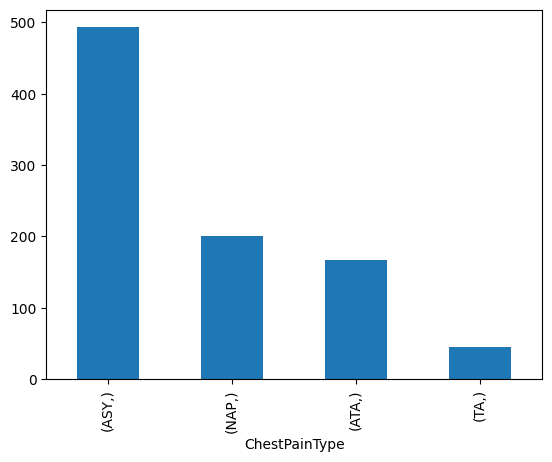

In [16]:
#Finding the number of O's and number of 1's
pd.DataFrame(data['ChestPainType']).value_counts().plot(kind = 'bar')

In [17]:
#Filling the ChestPainType parameter with the most common value for the parameter.
data['ChestPainType']=data['ChestPainType'].fillna('ASY')

In [18]:
data = data.dropna()

In [19]:
data.shape

(910, 12)

In [20]:
#Check the NAs in dataset for Age
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,910.0,53.686989,9.310760,28.0,48.00,54.0,60.00,77.0
RestingBP,910.0,132.329670,18.498568,0.0,120.00,130.0,140.00,200.0
Cholesterol,910.0,197.427995,109.072830,0.0,172.25,221.0,265.75,603.0
FastingBS,910.0,0.235165,0.424335,0.0,0.00,0.0,0.00,1.0
MaxHR,910.0,136.781319,25.498538,60.0,120.00,138.0,156.00,202.0
Oldpeak,910.0,0.888022,1.067646,-2.6,0.00,0.6,1.50,6.2
HeartDisease,910.0,0.553846,0.497365,0.0,0.00,1.0,1.00,1.0


# **Exploratory Data Analysis**

### Dividing features into Numerical and Categorical :

In [22]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

- For this dataset, as the number of features are less, we can manually check the dataset as well.

### Categorical Features :

In [23]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0.0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0.0


<Axes: xlabel='RestingECG'>

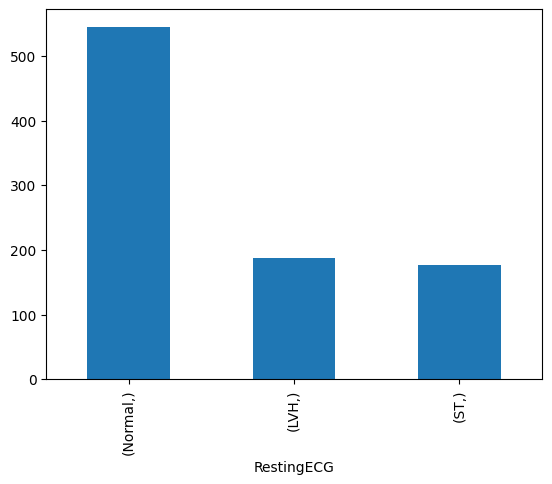

In [24]:
pd.DataFrame(data['RestingECG']).value_counts().plot(kind = 'bar')

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_transformed = data.copy(deep = True)

data_transformed['Sex'] = le.fit_transform(data_transformed['Sex'])
data_transformed['ChestPainType'] = le.fit_transform(data_transformed['ChestPainType'])
data_transformed['RestingECG'] = le.fit_transform(data_transformed['RestingECG'])
data_transformed['ExerciseAngina'] = le.fit_transform(data_transformed['ExerciseAngina'])
data_transformed['ST_Slope'] = le.fit_transform(data_transformed['ST_Slope'])


- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

In [26]:
data_transformed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1,1,140,289.0,0,1,172,0,0.0,2,0.0
1,49.0,0,2,160,180.0,0,1,156,0,1.0,1,1.0
2,37.0,1,1,130,283.0,0,2,98,0,0.0,2,0.0
3,48.0,0,0,138,214.0,0,1,108,1,1.5,1,1.0
4,54.0,1,2,150,195.0,0,1,122,0,0.0,2,0.0


#### Distribution of Categorical Features :

<ipython-input-27-3ee265d7927a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_transformed[categorical_features[i]],kde_kws = {'bw' : 1});
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-27-3ee265d7927a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

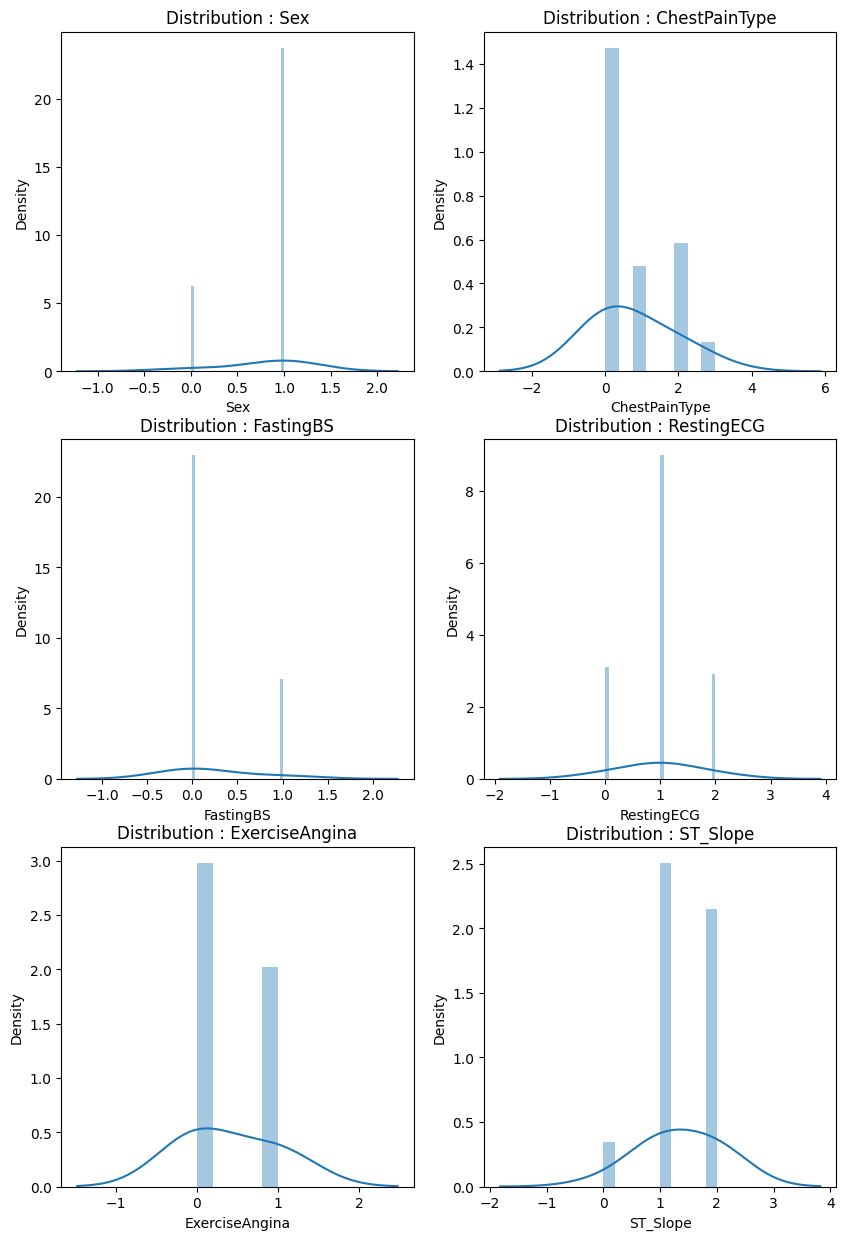

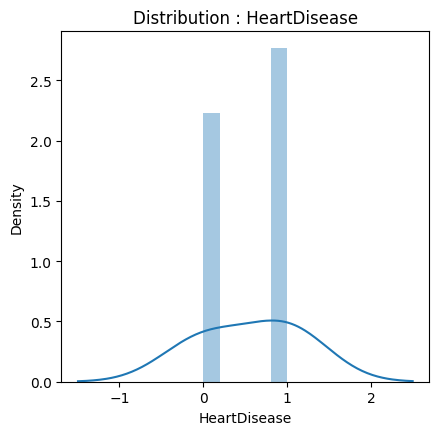

In [27]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(data_transformed[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(data_transformed[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- All the categorical features are near about **Normally Distributed**.

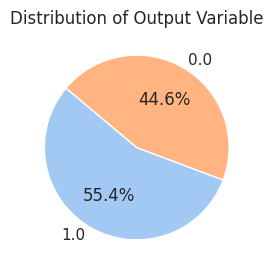

In [28]:
output_counts = data_transformed['HeartDisease'].value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(3, 3))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Output Variable')
plt.show()

<Axes: xlabel='HeartDisease'>

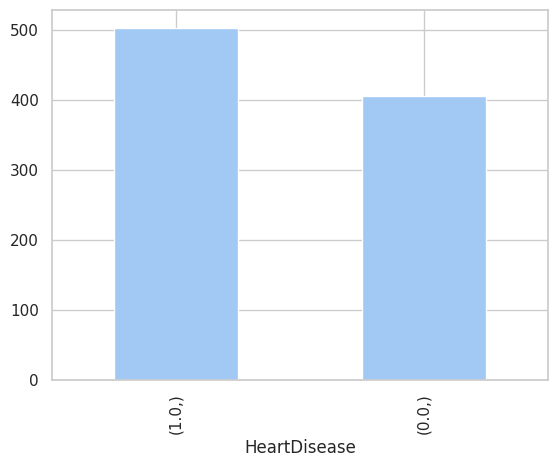

In [29]:
pd.DataFrame(data['HeartDisease']).value_counts().plot(kind = 'bar')

### Numerical Features :

#### Distribution of Numerical Features :

<ipython-input-30-c58e614d1d08>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]])
<ipython-input-30-c58e614d1d08>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]])
<ipython-input-30-c58e614d1d08>:4: UserWarning: 

`distplot` is a deprecated

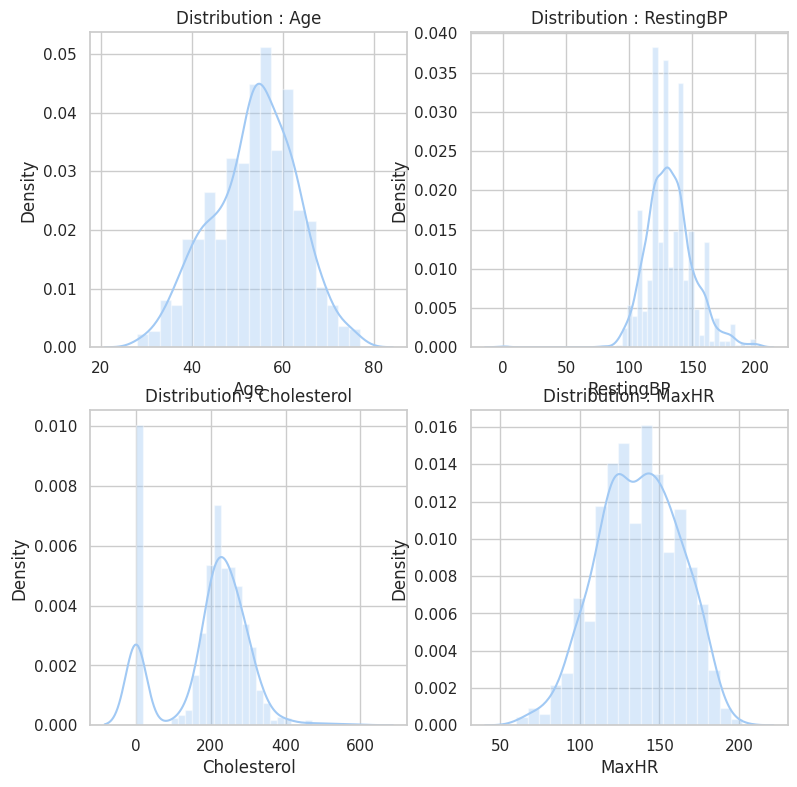

<ipython-input-30-c58e614d1d08>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_transformed[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


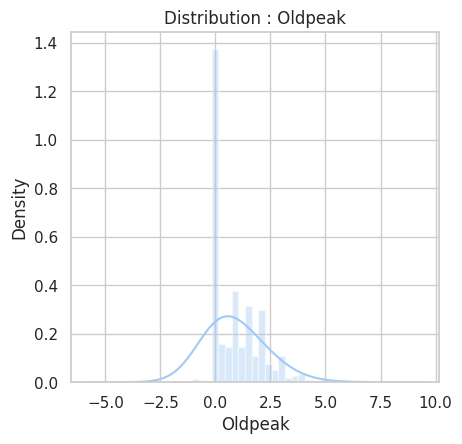

In [30]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (9,9))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(data_transformed[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution.

# **Feature Engineering**

### Data Scaling :

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

In [31]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

data_transformed['Oldpeak'] = mms.fit_transform(data_transformed[['Oldpeak']])
data_transformed['Age'] = ss.fit_transform(data_transformed[['Age']])
data_transformed['RestingBP'] = ss.fit_transform(data_transformed[['RestingBP']])
data_transformed['Cholesterol'] = ss.fit_transform(data_transformed[['Cholesterol']])
data_transformed['MaxHR'] = ss.fit_transform(data_transformed[['MaxHR']])
data_transformed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.470827,1,1,0.414873,0.840011,0,1,1.381963,0,0.295455,2,0.0
1,-0.503672,0,2,1.496632,-0.159871,0,1,0.754131,0,0.409091,1,1.0
2,-1.793212,1,1,-0.126007,0.784971,0,2,-1.521760,0,0.295455,2,0.0
3,-0.611133,0,0,0.306697,0.152019,0,1,-1.129365,1,0.465909,1,1.0
4,0.033637,1,2,0.955752,-0.022273,0,1,-0.580012,0,0.295455,2,0.0


### Correlation Matrix :

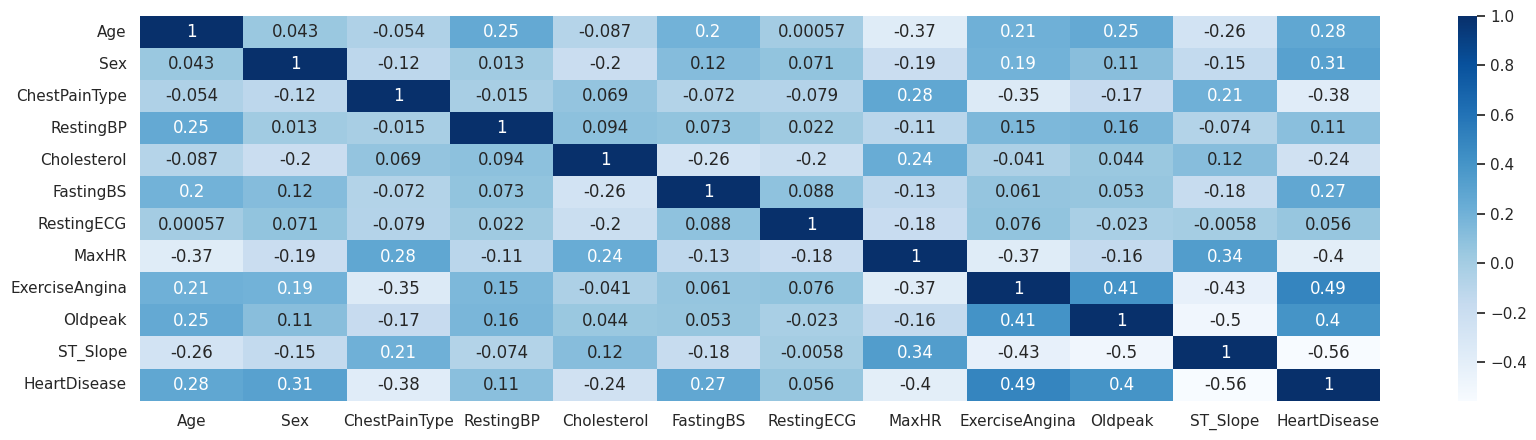

In [32]:
plt.figure(figsize = (20,5))
sns.heatmap(data_transformed.corr(),cmap = 'Blues',annot = True);

- It is a huge matrix with too many features. We will check the correlation only with respect to **HeartDisease**.

In [33]:
X_corr = data_transformed.corr()
for row in X_corr.index:
    for col in X_corr.columns:
      if(row!=col):
        value = X_corr.loc[row, col]
        if value > 0.7 or value < -0.7:
            print(f"Value {value} in cell ({row}, {col}) is outside the range.")
      else:
          print("There are no values in that range")

There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range
There are no values in that range


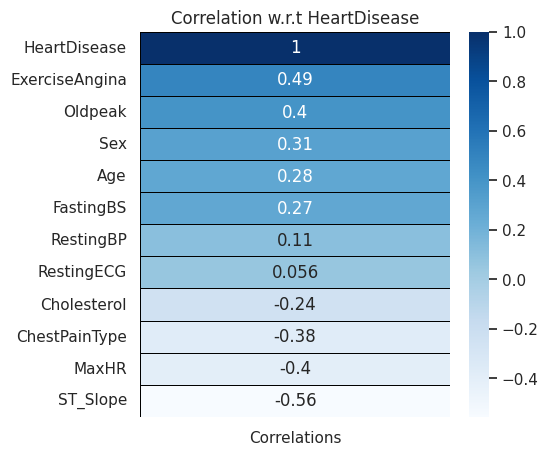

In [34]:
corr = data_transformed.corrwith(data_transformed['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'Blues',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

- Except for **RestingBP** and **RestingECG**, everyone displays a positive or negative relationship with **HeartDisease**.

### Feature Selection for Categorical Features :


A Chi-squared test is a statistical tool used to analyze **categorical data** and **assess relationships between them**. It helps us understand if the observed distribution of data in specific categories differs significantly from what we would expect if the variables were independent of each other.

Here are the two main applications of Chi-squared tests:

1) **Goodness-of-fit test:** This type of Chi-squared test compares the observed distribution of a single categorical variable with a predefined expected distribution. It helps determine whether the *observed data deviates significantly from the expected distribution*, suggesting a potential association between the variable and an external factor influencing its distribution.

2) **Test of independence:** This type of Chi-squared test is used to assess if two categorical variables are independent of each other. It compares the observed frequency of co-occurrences of categories from both variables against the expected frequency if they were independent. A significant difference between observed and expected co-occurrences suggests a dependence between the variables.


#### Chi Squared Test :

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

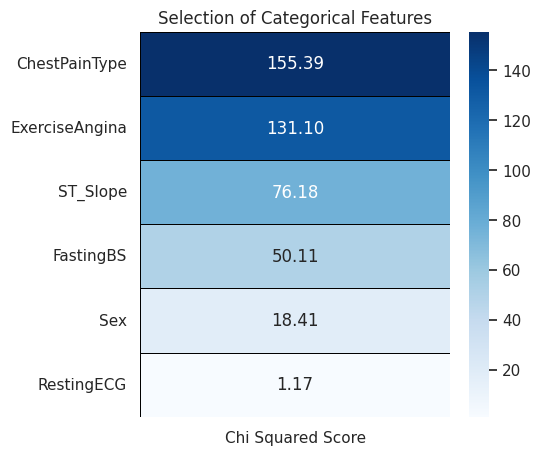

In [36]:
features = data_transformed.loc[:,categorical_features[:-1]]
target = data_transformed.loc[:,categorical_features[-1]]

#SelectKBest class from the scikit-learn library is chosen.
#This class helps select the best features based on a provided scoring function.
#score_func = chi2: This argument specifies the scoring function to use for selecting features.
#Here, chi2 is used, indicating the Chi-squared test.
#k = 'all': This argument specifies the number of features to select.
#Setting it to 'all' indicates selecting all features and ranking them based on their scores.

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,
            cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- Except **RestingECG**, all the remaining categorical features are pretty important for predicting heart diseases.

### Feature Selection for Numerical Features :

#### ANOVA Test :


An **Analysis of Variance (ANOVA)** test is a statistical technique used to compare the means of two or more groups within a dataset. It helps us determine if there's a statistically significant difference between the means of these groups. Here's a breakdown of its application and purpose:

ANOVA partitions the total variance in the data into two components:

1) **Variance between groups:** This represents the spread of means between different groups.

2) **Variance within groups:** This represents the spread of individual data points within each group.
By comparing these variances, ANOVA assesses if the differences between group means are likely due to random chance or if there's a true underlying effect.

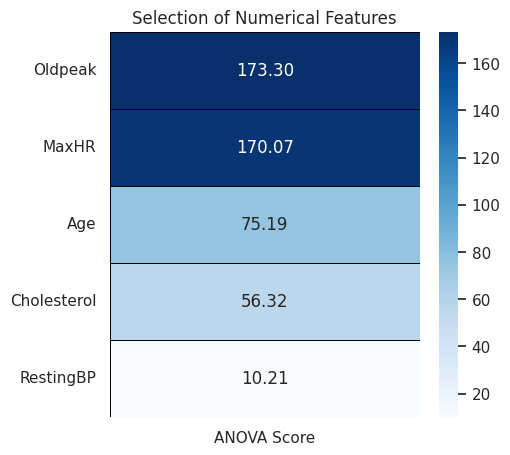

In [37]:
from sklearn.feature_selection import f_classif

features = data_transformed.loc[:,numerical_features]
target = data_transformed.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = "Blues",
            linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- We will leave out **RestingBP** from the modeling part and take the remaining features.

# **Modeling**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [39]:
features = data_transformed[data_transformed.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = data_transformed['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

Cross Validation Score:

A **cross-validation score** is a metric used to estimate the generalizability of a machine learning model's performance on unseen data. It helps us avoid overfitting, which occurs when a model performs well on the training data but poorly on new data it hasn't been trained on.

Here's how cross-validation scores work:

1) **Splitting the data:** The dataset is divided into folds (typically k-folds, where k is a common choice like 5 or 10).

2) **Iterative training and evaluation:**
In each iteration, one fold is held out as the test set and the remaining folds are used as the training set.
The model is trained on the training set and then evaluated on the held-out test set using a chosen performance metric (e.g., accuracy, precision, recall).
This process is repeated k times, with each fold serving as the test set once.

3) **Calculating the score:** The individual performance scores from each iteration are averaged to obtain the final cross-validation score.

In [57]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = "Blues",fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Logistic Regression :

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

In [60]:
model(classifier_lr)

Accuracy :  86.81%
Cross Validation Score :  90.80%


              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85        81
         1.0       0.86      0.91      0.88       101

    accuracy                           0.87       182
   macro avg       0.87      0.86      0.87       182
weighted avg       0.87      0.87      0.87       182



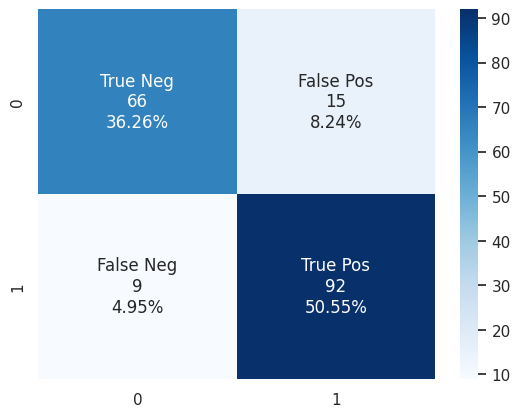

In [61]:
model_evaluation(classifier_lr)

#### 2] Decision Tree Classifier :

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [64]:
model(classifier_dt)

Accuracy :  81.32%
Cross Validation Score :  89.56%


              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78        81
         1.0       0.81      0.87      0.84       101

    accuracy                           0.81       182
   macro avg       0.81      0.81      0.81       182
weighted avg       0.81      0.81      0.81       182



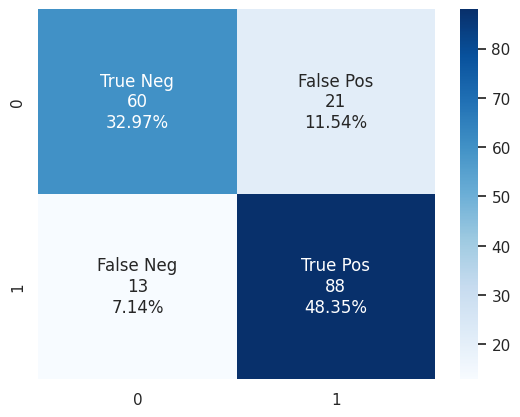

In [65]:
model_evaluation(classifier_dt)

#### 3] Random Forest Classifier :

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [68]:
model(classifier_rf)

Accuracy :  85.16%
Cross Validation Score :  92.67%


              precision    recall  f1-score   support

         0.0       0.88      0.78      0.82        81
         1.0       0.84      0.91      0.87       101

    accuracy                           0.85       182
   macro avg       0.86      0.84      0.85       182
weighted avg       0.85      0.85      0.85       182



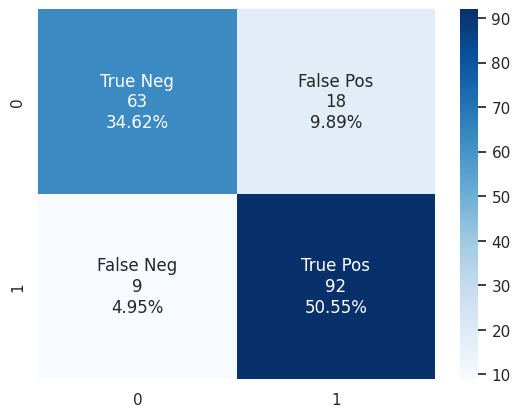

In [69]:
model_evaluation(classifier_rf)

### Alogrithm Results Table :


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|
|-|-|-|-|
|1|Logistic Regression|86.81%|90.80%|
|2|Decision Tree Classifier|81.32%|89.56%|
|3|Random Forest Classifier|85.16%|92.67%|

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Conclusion</div></center>

- This dataset is great for understanding how to handle binary classification problems with the combination of numerical and categorical features.


- Subject matter experts, in this case doctors or nurses, can be assisted by providing insights that enables them to take the next line of action.


- For feature engineering, it might feel confusing about the order of the processes. In this case, data scaling was executed before the feature selection test. We might feel like we are tampering the data before passing it to the tests but the results are same irrespective of the order of the process. (Try it out!)


- Visualization is key. It makes the data talkative. Displaying the present information and results of any tests or output through visualization becomes crucial as it makes the understanding easy.


- For modeling, hyperparameter tuning is not done. It can push the performances of the algorithms. Overall the algorithm performances are good.